In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [4]:
df.drop("SNo" , axis=1 , inplace=True)

In [5]:
df.columns = ["A" , "B" , "C"]

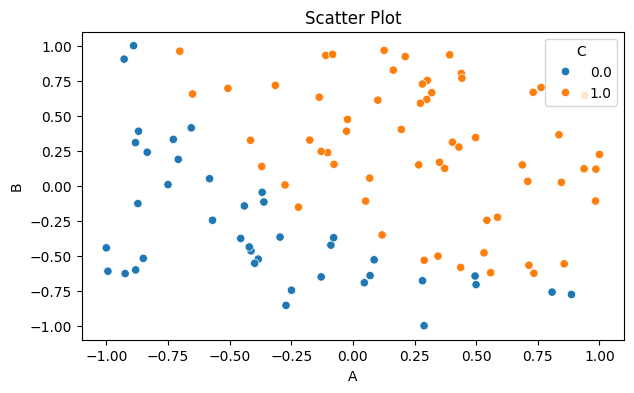

In [6]:
# scatter plot using the hue parameter "C"
plt.figure(figsize=(7,4))
sns.scatterplot(data=df , x="A" , y="B" , hue="C")
plt.title("Scatter Plot")
plt.show()

In [7]:
# we have seen the data pattern and now we wil apply the logistic regression


In [8]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [14]:
# splilting the data into the training and testing
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 2)
(30, 2)
(70,)
(30,)


In [15]:
# prompt: generate the logistic regression model , train and test the data , return the classfification report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        12
         1.0       0.94      0.89      0.91        18

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [17]:
print("testing accuracy" , model.score(x_test , y_test)*100)
print("training accuracy" , model.score(x_train , y_train)*100)

testing accuracy 90.0
training accuracy 90.0


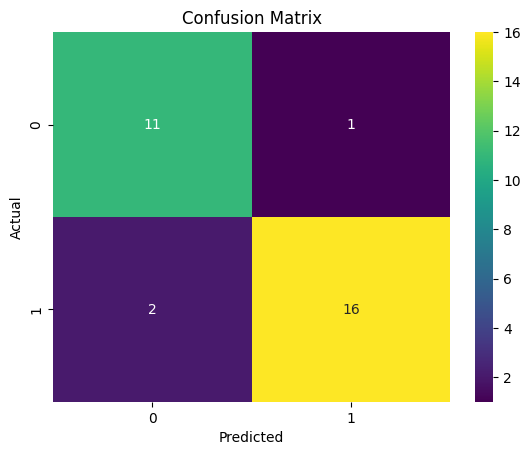

In [16]:
# prompt: draw the confusion matrix for the above model

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d' , cmap="viridis")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


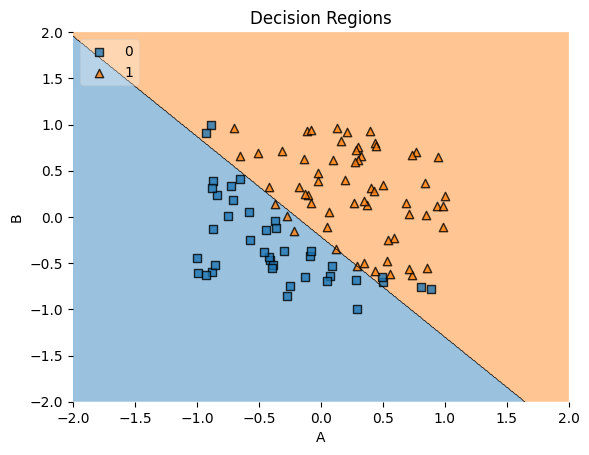

In [30]:
# mlstend graph for checking the decision boundry
import numpy as np
from mlxtend.plotting import plot_decision_regions

model.fit(x , y)

# separating the x and y feature values
X = df[['A' , 'B']].values
y = y = df['C'].values.astype(np.int_)

# ploting the decision boundry
plot_decision_regions(X , y , clf=model , legend=2)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Decision Regions')
plt.show()
